IMPORT ALL THE REQUIRED LIBRARIES

In [3]:
import numpy as np

DEFINE THE ENVIRONEMENT AND AGENT ACTIONS

In [4]:
environment_rows = 17
environment_columns = 17

q_values = np.zeros((environment_rows, environment_columns, 4))

#numeric action codes: 0 = up, 1 = right, 2 = down, 3 = left
actions = ['up', 'right', 'down', 'left']

rewards = np.full((17, 17), -100.)

# Set the reward for the packaging area (i.e., the goal) to 100
rewards[0, 8] = 100.

# Define aisle locations (i.e., white squares) for rows 1 through 15
aisles = {}

aisles[1] = [i for i in range(1, 16)]
aisles[2] = [1, 7, 9, 15]
aisles[3] = [i for i in range(1, 8)]
aisles[3].append(9)
aisles[3].append(15)
aisles[4] = [3, 7, 13]
aisles[5] = [i for i in range(17)]
aisles[6] = [5, 11]
aisles[7] = [i for i in range(1, 16)]
aisles[8] = [3, 7, 13]
aisles[9] = [i for i in range(17)]
aisles[10] = [5, 11]
aisles[11] = [i for i in range(1, 16)]
aisles[12] = [3, 7, 13]
aisles[13] = [i for i in range(17)]
aisles[14] = [5, 11]
aisles[15] = [i for i in range(1, 16)]

# Set the rewards for all aisle locations (i.e., white squares)
for row_index in range(1, 16):
  for column_index in aisles[row_index]:
    rewards[row_index, column_index] = -1.
  
for row in rewards:
  print(row)

[-100. -100. -100. -100. -100. -100. -100. -100.  100. -100. -100. -100.
 -100. -100. -100. -100. -100.]
[-100.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.
   -1.   -1.   -1.   -1. -100.]
[-100.   -1. -100. -100. -100. -100. -100.   -1. -100.   -1. -100. -100.
 -100. -100. -100.   -1. -100.]
[-100.   -1.   -1.   -1.   -1.   -1.   -1.   -1. -100.   -1. -100. -100.
 -100. -100. -100.   -1. -100.]
[-100. -100. -100.   -1. -100. -100. -100.   -1. -100. -100. -100. -100.
 -100.   -1. -100. -100. -100.]
[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
[-100. -100. -100. -100. -100.   -1. -100. -100. -100. -100. -100.   -1.
 -100. -100. -100. -100. -100.]
[-100.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.
   -1.   -1.   -1.   -1. -100.]
[-100. -100. -100.   -1. -100. -100. -100.   -1. -100. -100. -100. -100.
 -100.   -1. -100. -100. -100.]
[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
[-100. -100. -100. -

VISULAIZE THE PROBLEM

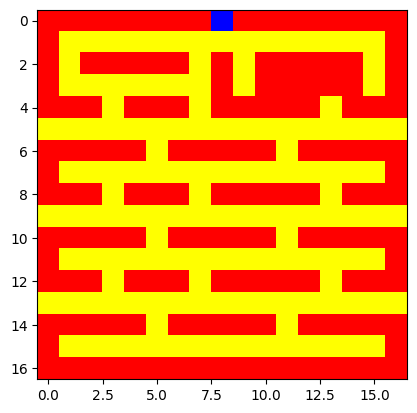

In [5]:
import matplotlib.pyplot as plt

cmap_custom = plt.cm.colors.ListedColormap(['red', 'yellow', 'blue'])
bounds_custom = [-200, -50, 0, 50, 100, 200]  # set color boundaries
norm_custom = plt.Normalize(bounds_custom[0], bounds_custom[-1])

# Plot the rewards matrix
fig, ax = plt.subplots()
ax.imshow(rewards, cmap=cmap_custom, norm=norm_custom)
for i in range(rewards.shape[0]):
    for j in range(rewards.shape[1]):
        reward_value = rewards[i, j]
        color_index = np.searchsorted(bounds_custom, reward_value) - 1
        color = cmap_custom(norm_custom(color_index))
plt.show()

TERMINAL STATE FUNCTION

In [6]:
#define a function that determines if the specified location is a terminal state
def is_terminal_state(current_row_index, current_column_index):
  #if the reward for this location is -1, then it is not a terminal state (i.e., it is a 'white square')
  if rewards[current_row_index, current_column_index] == -1.:
    return False
  else:
    return True

STARTING LOCATION FUNCTION

In [7]:
#define a function that will choose a random, non-terminal starting location
def get_starting_location():
  
  current_row_index = np.random.randint(environment_rows)
  current_column_index = np.random.randint(environment_columns)
  
  while is_terminal_state(current_row_index, current_column_index):
    current_row_index = np.random.randint(environment_rows)
    current_column_index = np.random.randint(environment_columns)
    
    
  return current_row_index, current_column_index

EPSILON GREEDY ALGORITHM

In [8]:
#define an epsilon greedy algorithm that will choose which action to take next (i.e., where to move next)
def get_next_action(current_row_index, current_column_index, epsilon):
  #if a randomly chosen value between 0 and 1 is less than epsilon, 
  #then choose the most promising value from the Q-table for this state.
  if np.random.random() < epsilon:
    return np.argmax(q_values[current_row_index, current_column_index])
  else: #choose a random action
    return np.random.randint(4)

DEFINE DIFFERENT POSSIBLE ACTIONS

In [9]:
#define a function that will get the next location based on the chosen action
def get_next_location(current_row_index, current_column_index, action_index):
  new_row_index = current_row_index
  new_column_index = current_column_index
  if actions[action_index] == 'up' and current_row_index > 0:
    new_row_index -= 1
  elif actions[action_index] == 'right' and current_column_index < environment_columns - 1:
    new_column_index += 1
  elif actions[action_index] == 'down' and current_row_index < environment_rows - 1:
    new_row_index += 1
  elif actions[action_index] == 'left' and current_column_index > 0:
    new_column_index -= 1
  return new_row_index, new_column_index

SHORTEST PATH FUNCTION

In [10]:
def get_shortest_path(start_row_index, start_column_index):
  #return immediately if this is an invalid starting location
  if is_terminal_state(start_row_index, start_column_index):
    return []
  else: #if this is a 'legal' starting location
    current_row_index, current_column_index = start_row_index, start_column_index
    shortest_path = []
    shortest_path.append([current_row_index, current_column_index])
    #continue moving along the path until we reach the goal (i.e., the item packaging location)
    while not is_terminal_state(current_row_index, current_column_index):
      #get the best action to take
      action_index = get_next_action(current_row_index, current_column_index, 1.)
      #move to the next location on the path, and add the new location to the list
      current_row_index, current_column_index = get_next_location(current_row_index, current_column_index, action_index)
      shortest_path.append([current_row_index, current_column_index])
    return shortest_path

TRAIN THE AGENT

In [11]:
#define training parameters
epsilon = 0.9 #the percentage of time when we should take the best action (instead of a random action)
discount_factor = 0.9 #discount factor for future rewards
learning_rate = 0.9 #the rate at which the AI agent should learn

#run through 1000 training episodes
for episode in range(1000):
  #get the starting location for this episode
  row_index, column_index = get_starting_location()

  #continue taking actions (i.e., moving) until we reach a terminal state
  #(i.e., until we reach the item packaging area or crash into an item storage location)
  while not is_terminal_state(row_index, column_index):
    #choose which action to take (i.e., where to move next)
    action_index = get_next_action(row_index, column_index, epsilon)

    #perform the chosen action, and transition to the next state (i.e., move to the next location)
    old_row_index, old_column_index = row_index, column_index 
    row_index, column_index = get_next_location(row_index, column_index, action_index)
    
    #receive the reward for moving to the new state, and calculate the temporal difference
    reward = rewards[row_index, column_index]
    old_q_value = q_values[old_row_index, old_column_index, action_index]
    temporal_difference = reward + (discount_factor * np.max(q_values[row_index, column_index])) - old_q_value

    #update the Q-value for the previous state and action pair
    new_q_value = old_q_value + (learning_rate * temporal_difference)
    q_values[old_row_index, old_column_index, action_index] = new_q_value

print('\nTraining complete!')



Training complete!


TESTING PHASE

In [12]:
print(get_shortest_path(3, 9)) #starting at row 3, column 9
print(get_shortest_path(5, 0)) #starting at row 5, column 0
print(get_shortest_path(9, 5)) #starting at row 9, column 5

[[3, 9], [2, 9], [1, 9], [1, 8], [0, 8]]
[[5, 0], [5, 1], [5, 2], [5, 3], [5, 4], [5, 5], [5, 6], [5, 7], [4, 7], [3, 7], [2, 7], [1, 7], [1, 8], [0, 8]]
[[9, 5], [9, 6], [9, 7], [8, 7], [7, 7], [7, 6], [7, 5], [6, 5], [5, 5], [5, 6], [5, 7], [4, 7], [3, 7], [2, 7], [1, 7], [1, 8], [0, 8]]


AGENT RETURNS BACK TO STARTING LOCATION

In [13]:
path = get_shortest_path(3, 9) #go to row 5, column 2
path.reverse()
print(path)

[[0, 8], [1, 8], [1, 9], [2, 9], [3, 9]]
